In [1]:
#!/bin/env python

from __future__ import absolute_import, division, print_function, unicode_literals

import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"


import matplotlib.style
import matplotlib as mpl
mpl.use('Agg')
# mpl.style.use('seaborn')
mpl.rc('image', cmap='gray')
import matplotlib.pyplot as plt
	
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,10)


import time, re, sys, os
from tqdm import tqdm, trange
import cv2
import pandas as pd
import xarray as xr
from glob import glob
import numpy as np
from scipy import stats
# Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install --user Pillow

from PIL import Image



In [2]:
climate_counter = 246718

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path + "logan_climate_images_at_generator_{}_wo_norm_one_channel_512.npy".format(climate_counter))
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)

(600, 512, 512, 1)


500it [00:49, 10.10it/s]


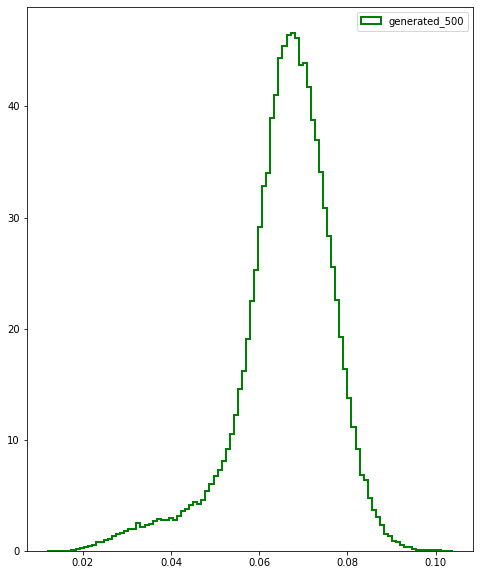

In [5]:
number_l2 = 500

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = [ "omega"]
    
for chan in range(len(channel_names)):
    generated_image = omega_generated_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



#     l2_real = []
#     for i, img in tqdm(enumerate(real_image)):
#         foo = [calculateDistance(img,j) for j in real_image[i+1:]]
#         l2_real.append(foo)
#     real_distances = [j for i in l2_real for j in i]

    plt.hist([ fake_distances ], color=[  'g'], bins=100, linewidth=2 ,histtype='step', label=["generated_{}".format(number_l2)], density=True)
#     plt.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    plt.legend(loc='best')

In [ ]:
#  Style mixing and cropping removes mode collapse